In [62]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df= pd.read_csv("hotel_reviews.csv")
df.head()

,id,dateadded,dateupdated,address,categories,primarycategories,city,country,keys,latitude,...,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username,sourceurls,websites,location
0,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,NaN,NaN,Paula,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,POINT(-117.186136 32.990959)
1,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,5.0,https://www.hotels.com/hotel/125419/reviews%20/,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,NaN,NaN,D,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,POINT(-117.186136 32.990959)
2,AVwc252WIN2L1WUfpqLP,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,us/ca/ranchosantafe/5921valenciacir/359754519,32.990959,...,5.0,https://www.hotels.com/hotel/125419/reviews%20/,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,NaN,NaN,Ron,http://www.hotels.com/ho125419/%25252525253Flo...,http://www.ranchovalencia.com,POINT(-117.186136 32.990959)
3,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,2.0,https://www.tripadvisor.com/Hotel_Review-g4118...,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA,jaeem2016,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,POINT(-76.716341 39.155929)
4,AVwdOclqIN2L1WUfti38,2015-11-28T19:19:35Z,2018-09-10T21:06:16Z,7520 Teague Rd,"Hotels,Hotels and motels,Travel agencies and b...",Accommodation & Food Services,Hanover,US,us/md/hanover/7520teaguerd/-2043779672,39.155929,...,5.0,https://www.tripadvisor.com/Hotel_Review-g4118...,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD,MamaNiaOne,http://www.yellowbook.com/profile/aloft-arunde...,http://www.starwoodhotels.com/alofthotels/prop...,POINT(-76.716341 39.155929)


In [64]:
df.tail()

,id,dateadded,dateupdated,address,categories,primarycategories,city,country,keys,latitude,...,reviews_rating,reviews_sourceurls,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username,sourceurls,websites,location
9995,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Accommodation & Food Services,Rockaway Beach,US,us/or/rockawaybeach/215spacificst/-1035432852,45.61126,...,3.0,http://www.tripadvisor.com/Hotel_Review-g52043...,It is hard for me to review an oceanfront hote...,Picture Window Ocean View!,Wildwood,GA,LASH0211,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com,POINT(-123.94556 45.61126)
9996,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,669 Route 6a,"Hotel,Hotels",Accommodation & Food Services,East Sandwich,US,us/ma/eastsandwich/669route6a/-1480952475,41.72939,...,4.0,https://www.tripadvisor.com/Hotel_Review-g4154...,"I live close by, and needed to stay somewhere ...","Clean, comfortable and quiet",East Sandwich,MA,Gennaker,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com,POINT(-70.39925 41.72939)
9997,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Accommodation & Food Services,Coeur d'Alene,US,us/id/coeurd'alene/702wapplewayave/210547670,47.69993,...,4.0,https://www.tripadvisor.com/Hotel_Review-g3541...,Rolled in 11:30 laid out heads down woke up to...,Passing through,Montana,UnitedStates,Amber406,https://www.tripadvisor.com/Hotel_Review-g3541...,http://www.shiloinns.com,POINT(-116.7969 47.69993)
9998,AVwdHbizIN2L1WUfsXto,2016-12-13T03:44:36Z,2018-01-01T00:00:43Z,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Accommodation & Food Services,Jackson,US,us/tn/jackson/2295nhighlandave/1759289930,35.66639,...,1.0,https://www.tripadvisor.com/Hotel_Review-g5512...,Absolutely terrible..I was told I was being gi...,Terrible,woodbury,NaN,donWoodbury,https://www.tripadvisor.com/Hotel_Review-g5512...,http://api.citygridmedia.com/content/places/v2...,POINT(-88.83012 35.66639)
9999,AVwddMfdIN2L1WUfwAue,2016-06-22T19:07:21Z,2018-01-01T00:00:43Z,3811 Minnesota Dr,"Hotel,Motels,Lodging,Hotels,Hotels and Motels",Accommodation & Food Services,Anchorage,US,us/ak/anchorage/3811minnesotadr/806029870,61.18531,...,1.0,https://www.tripadvisor.com/Hotel_Review-g6088...,"Filthy, outdated, noisy neighbours, but this w...",Polde,Sempeter pri Gorici,Slovenia,janezr2013,https://www.tripadvisor.com/Hotel_Review-g6088...,http://royalsuitealaska.com,POINT(-149.912 61.18531)


In [65]:
df.shape

(10000, 26)

In [66]:
#All columns in the dataset
df.columns

Index(['id', 'dateadded', 'dateupdated', 'address', 'categories',
       'primarycategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalcode', 'province', 'reviews_date', 'reviews_dateseen',
       'reviews_rating', 'reviews_sourceurls', 'reviews_text', 'reviews_title',
       'reviews_usercity', 'reviews_userprovince', 'reviews_username',
       'sourceurls', 'websites', 'location'],
      dtype='object')

In [67]:
#Count null values
df.isnull().sum()

id                         0
dateadded                  0
dateupdated                0
address                    0
categories                 0
primarycategories          0
city                       0
country                    0
keys                       0
latitude                   0
longitude                  0
name                       0
postalcode                 0
province                   0
reviews_date               0
reviews_dateseen           0
reviews_rating             0
reviews_sourceurls         0
reviews_text               1
reviews_title              1
reviews_usercity        5836
reviews_userprovince    7295
reviews_username           0
sourceurls                 0
websites                   0
location                   0
dtype: int64

#### We release that there is some null values and data need to be cleaned

In [68]:
#Copy the original dataset into another dataframe df0
df0= df

In [69]:
#we are going to replace the empty reviews_user_city by the hotel's cities
#and the reviews_user_province by the hotel's provinces
df0['reviews_userprovince'].fillna(value=df0['province'], inplace=True)
df0['reviews_usercity'].fillna(value=df0['city'], inplace=True)

In [70]:
df0['reviews_userprovince'].sample(10)

4887    VA
2146    NV
8426    KS
8048    IN
3987    GA
3220    MD
3754    FL
7834    TN
1518    IL
4508    TN
Name: reviews_userprovince, dtype: object

In [71]:
df0['reviews_usercity'].sample(10)

7215     United States
4282       Springfield
9233            Ottawa
7591            Boston
5215    Virginia Beach
7993            Zwolle
4417       Springfield
9561            Fulton
4484       Chapel Hill
9814       Panama City
Name: reviews_usercity, dtype: object

In [72]:
#Remove some unuseful columns from the dataset
df0 = df0.drop(['id','keys','reviews_sourceurls','sourceurls','websites','location'],axis=1)
df0.head(2)


,dateadded,dateupdated,address,categories,primarycategories,city,country,latitude,longitude,name,postalcode,province,reviews_date,reviews_dateseen,reviews_rating,reviews_text,reviews_title,reviews_usercity,reviews_userprovince,reviews_username
0,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2013-11-14T00:00:00Z,"2016-08-03T00:00:00Z,2016-07-26T00:00:00Z,2016...",5.0,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,Rancho Santa Fe,CA,Paula
1,2016-10-30T21:42:42Z,2018-09-10T21:06:27Z,5921 Valencia Cir,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA,2014-07-06T00:00:00Z,"2016-08-02T00:00:00Z,2016-08-26T00:00:00Z,2016...",5.0,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,Rancho Santa Fe,CA,D


In [77]:
df0['dateadded'].str[:10]

0       2016-10-30
1       2016-10-30
2       2016-10-30
3       2015-11-28
4       2015-11-28
           ...    
9995    2016-03-24
9996    2015-10-26
9997    2016-06-11
9998    2016-12-13
9999    2016-06-22
Name: dateadded, Length: 10000, dtype: object

In [78]:
#Let's convert the columns that contain dates and times into date time format
df0['dateadded']=df0['dateadded'].str[:10]
df0['dateadded']= pd.to_datetime(df0['dateadded'])

df0['dateupdated']=df0['dateupdated'].str[:10]
df0['dateupdated']= pd.to_datetime(df0['dateupdated'])

df0['reviews_date']=df0['reviews_date'].str[:10]
df0['reviews_date']= pd.to_datetime(df0['reviews_date'])

df0['reviews_dateseen']=df0['reviews_dateseen'].str[:10]
df0['reviews_dateseen']= pd.to_datetime(df0['reviews_dateseen'])

In [79]:
df0.dtypes

dateadded               datetime64[ns]
dateupdated             datetime64[ns]
address                         object
categories                      object
primarycategories               object
city                            object
country                         object
latitude                       float64
longitude                      float64
name                            object
postalcode                      object
province                        object
reviews_date            datetime64[ns]
reviews_dateseen        datetime64[ns]
reviews_rating                 float64
reviews_text                    object
reviews_title                   object
reviews_usercity                object
reviews_userprovince            object
reviews_username                object
dtype: object

In [91]:
df0['categories'].value_counts()

Hotels,Hotel                                                                                                                                          1905
Hotel,Hotels                                                                                                                                           403
Hotel,Hotels Motels                                                                                                                                    233
Hotels,Hotels and motels,Hotel                                                                                                                         148
Hotels,Lodging,Motels,Hotel                                                                                                                            141
                                                                                                                                                      ... 
Motels,Hotels,Corporate Lodging,Hotels Motels,Family-friendly Hotels,T

In [92]:
def remove_end(thestring, ending):
    if thestring.endswith(ending):
        return thestring[:-len(ending)]
    return thestring

In [93]:
#create an empty dataset to put the cleaned up data
clean_data=pd.DataFrame(index=range(0,10000), columns=['categories', 'primarycategories'])


In [94]:
for i in range(len(df0)):
    single_list=[]
    for element in df0.categories[i].lower().replace(' ', ',').split(','):
        if element=='and':
            continue
        elif element=='&':
            continue
        else:
            # Append these single words to a list
            single_list.append(remove_end(element, 's'))
    #Then take the single words and reduce it to the unique words with set() then make it a list so that the words
    # can be joined back into a string. 
        clean_data.categories[i] = ', '.join(list(set(single_list)))

In [96]:
clean_data.categories.value_counts().head(10)

hotel                                 2308
motel, hotel                          1035
motel, lodging, hotel                  946
motel, corporate, lodging, hotel       235
corporate, lodging, hotel              235
corporate, motel, lodging, hotel       212
lodging, hotel                         183
motel, reservation, lodging, hotel     152
casino, resort, hotel                  142
boutique, hotel                        128
Name: categories, dtype: int64

In [99]:
clean_data.head()

,categories,primarycategories
0,"motel, reservation, resort, hotel",NaN
1,"motel, reservation, resort, hotel",NaN
2,"motel, reservation, resort, hotel",NaN
3,"motel, management, travel, agencie, hotel, bureau",NaN
4,"motel, management, travel, agencie, hotel, bureau",NaN


In [104]:
df0.primarycategories.value_counts()

Accommodation & Food Services                                    9928
Arts Entertainment & Recreation                                    45
Healthcare & Social Assistance,Accommodation & Food Services       18
Wholesale Trade,Accommodation & Food Services                       7
Accommodation & Food Services,Arts Entertainment & Recreation       1
Utilities                                                           1
Name: primarycategories, dtype: int64

In [116]:
for i in range(len(df0)):

    single_list = []
    # multiple split and joins on this data because of the unnecessary &, ',', and white space
    the_and = ''.join(df0.primarycategories[i].lower().split('&'))
    comma = ' '.join(the_and.split(','))
    double = ' '.join(comma.split('  '))
    # Once I had each word separated by one space, I ignored the words that always went together
    for item in double.split(' '):
        if item == 'services':
            continue
        elif item == 'arts':
            continue 
        elif item == 'social':
            continue
        else:
            # I took these remaining words at added them to a list
            single_list.append(item)

    # I joined the cleaned list of words into a single string and entered them into the clean_data
    clean_data.primarycategories[i] = ', '.join(single_list)

In [117]:
 clean_data.primarycategories.value_counts()

accommodation, food                               9928
entertainment, recreation                           45
healthcare, assistance, accommodation, food         18
wholesale, trade, accommodation, food                7
accommodation, food, entertainment, recreation       1
utilities                                            1
Name: primarycategories, dtype: int64

In [119]:
clean_data.sample(10)

,categories,primarycategories
3299,"motel, reservation, hotel","accommodation, food"
4781,"lounge, bar, hotel","accommodation, food"
5599,hotel,"accommodation, food"
5495,"motel, hotels-apartment, corporate, lodging, h...","accommodation, food"
5600,hotel,"accommodation, food"
4661,"boutique, motel, hotel","accommodation, food"
2951,"motel, reservation, restaurant, american, lodg...","accommodation, food"
4576,"bar, hotel","accommodation, food"
6503,"motel, lodging, hotel","accommodation, food"
6535,"motel, resort, family-friendly, corporate, bou...","accommodation, food"


In [120]:
df0.columns

Index(['dateadded', 'dateupdated', 'address', 'categories',
       'primarycategories', 'city', 'country', 'latitude', 'longitude', 'name',
       'postalcode', 'province', 'reviews_date', 'reviews_dateseen',
       'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_usercity',
       'reviews_userprovince', 'reviews_username'],
      dtype='object')

In [122]:
#Let's create an empty dataset to put on all cleaned data
df1= pd.DataFrame(index= range(0,10000), columns=['reviews_rating', 'reviews_title', 'reviews_text', 'hotel_name',
                                                 'clean_categories', 'primary_categories', 'address', 'city', 'province',
                                                 'country', 'postalcode', 'latitude', 'longitude', 'dateadded', 
                                                  'dateupdated', 'reviews_date', 'reviews_dateseen', 'reviews_usercity',
                                                  'reviews_userprovince', 'reviews_username'])

In [123]:
#Let's create an empty dataset to put on all cleaned data
for i in df1.columns:
    if i in df0.columns:
        df1[i]=df0[i]

In [124]:
df1.head()

,reviews_rating,reviews_title,reviews_text,hotel_name,clean_categories,primary_categories,address,city,province,country,postalcode,latitude,longitude,dateadded,dateupdated,reviews_date,reviews_dateseen,reviews_usercity,reviews_userprovince,reviews_username
0,5.0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...,NaN,NaN,NaN,5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2013-11-14,2016-08-03,Rancho Santa Fe,CA,Paula
1,5.0,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...,NaN,NaN,NaN,5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2014-07-06,2016-08-02,Rancho Santa Fe,CA,D
2,5.0,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...,NaN,NaN,NaN,5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2015-01-02,2016-11-15,Rancho Santa Fe,CA,Ron
3,2.0,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...,NaN,NaN,NaN,7520 Teague Rd,Hanover,MD,US,21076,39.155929,-76.716341,2015-11-28,2018-09-10,2016-05-15,2016-05-21,Richmond,VA,jaeem2016
4,5.0,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...,NaN,NaN,NaN,7520 Teague Rd,Hanover,MD,US,21076,39.155929,-76.716341,2015-11-28,2018-09-10,2016-07-09,2016-07-31,Laurel,MD,MamaNiaOne


In [126]:
#Fill the empty columns 

df1.hotel_name = df0.name
df1.clean_categories = clean_data.categories
df1.primary_categories = clean_data.primarycategories

In [127]:
df1.head()

,reviews_rating,reviews_title,reviews_text,hotel_name,clean_categories,primary_categories,address,city,province,country,postalcode,latitude,longitude,dateadded,dateupdated,reviews_date,reviews_dateseen,reviews_usercity,reviews_userprovince,reviews_username
0,5.0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...,Rancho Valencia Resort Spa,"motel, reservation, resort, hotel","accommodation, food",5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2013-11-14,2016-08-03,Rancho Santa Fe,CA,Paula
1,5.0,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...,Rancho Valencia Resort Spa,"motel, reservation, resort, hotel","accommodation, food",5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2014-07-06,2016-08-02,Rancho Santa Fe,CA,D
2,5.0,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...,Rancho Valencia Resort Spa,"motel, reservation, resort, hotel","accommodation, food",5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2015-01-02,2016-11-15,Rancho Santa Fe,CA,Ron
3,2.0,"Never again...beware, if you want sleep.",Currently in bed writing this for the past hr ...,Aloft Arundel Mills,"motel, management, travel, agencie, hotel, bureau","accommodation, food",7520 Teague Rd,Hanover,MD,US,21076,39.155929,-76.716341,2015-11-28,2018-09-10,2016-05-15,2016-05-21,Richmond,VA,jaeem2016
4,5.0,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...,Aloft Arundel Mills,"motel, management, travel, agencie, hotel, bureau","accommodation, food",7520 Teague Rd,Hanover,MD,US,21076,39.155929,-76.716341,2015-11-28,2018-09-10,2016-07-09,2016-07-31,Laurel,MD,MamaNiaOne


### Data Visualization

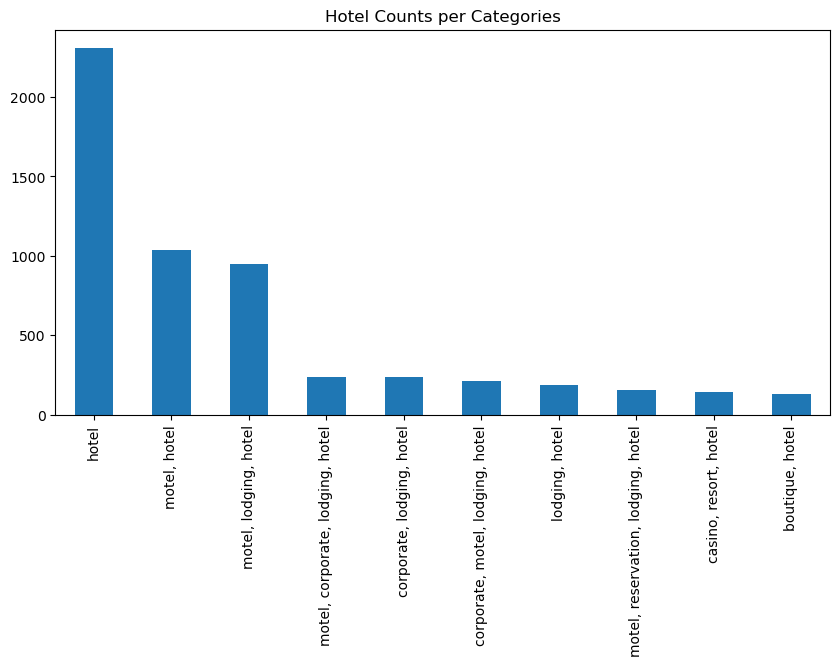

In [129]:
plt.figure(figsize=(10,5))
df1.clean_categories.value_counts().head(10).plot(kind='bar')
plt.title('Hotel Counts per Categories')
plt.show()

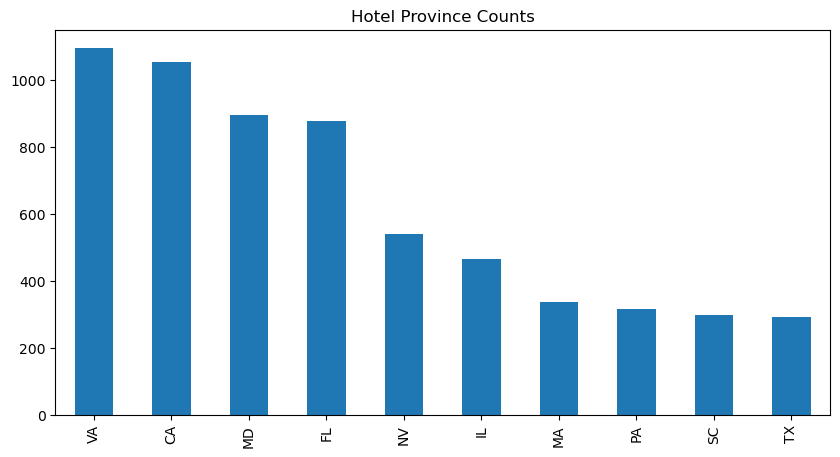

In [130]:
plt.figure(figsize=(10,5))
plt.title('Hotel Province Counts')
df1.province.value_counts().head(10).plot(kind='bar')
plt.show()

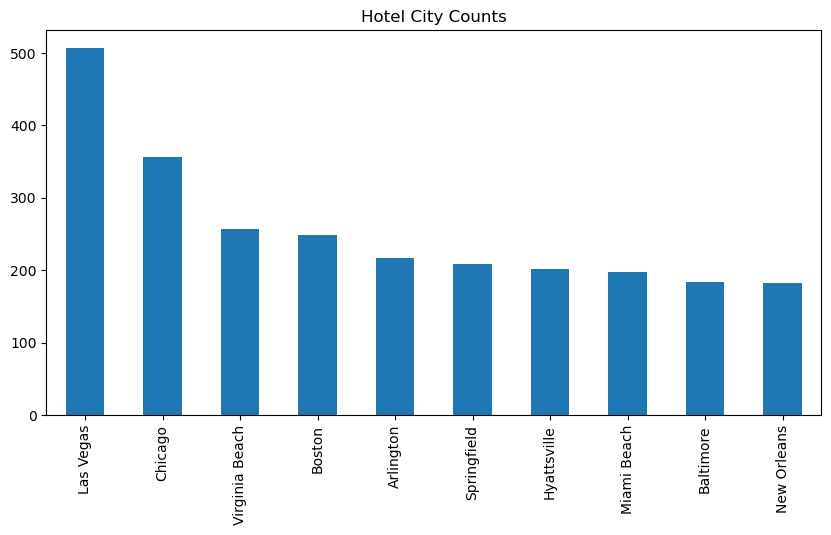

In [131]:
plt.figure(figsize=(10,5))
plt.title('Hotel City Counts')
df1.city.value_counts().head(10).plot(kind='bar')
plt.show()

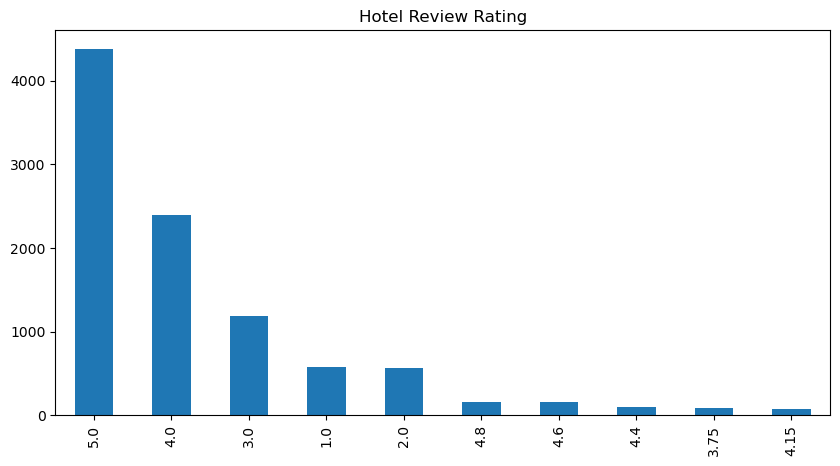

In [132]:
plt.figure(figsize=(10,5))
plt.title('Hotel Review Rating')
df1.reviews_rating.value_counts().head(10).plot(kind='bar')
plt.show()

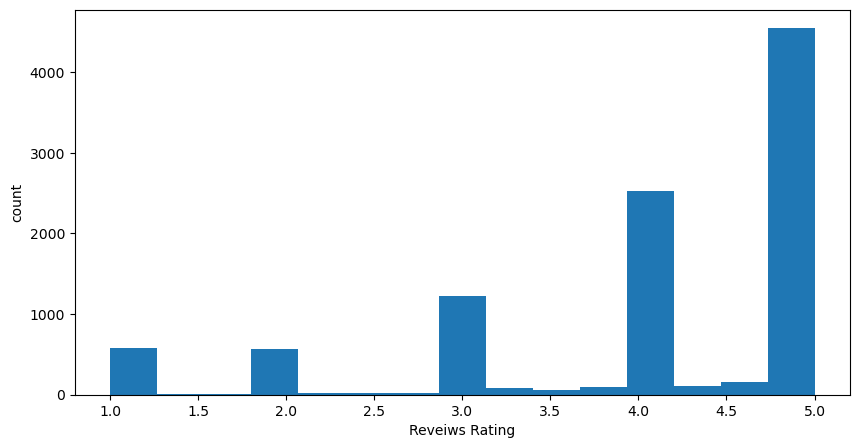

In [138]:
plt.figure(figsize=(10,5))
plt.xlabel('Reveiws Rating')
plt.ylabel('count')
plt.hist(df1['reviews_rating'], bins=15)
plt.show()

Here we see that the data has way more reviews that are above 3 stars.
So we will divide our data set into 2 categories:

* less and equal to 3 stars
* greater than 3 stars
So we will studies those reviews and see if there is a pattern.
Similar to sentiment to analysis.

In [140]:
df1= df1[df1['reviews_rating']>=3]
df1.head()

,reviews_rating,reviews_title,reviews_text,hotel_name,clean_categories,primary_categories,address,city,province,country,postalcode,latitude,longitude,dateadded,dateupdated,reviews_date,reviews_dateseen,reviews_usercity,reviews_userprovince,reviews_username
0,5.0,Best romantic vacation ever!!!!,Our experience at Rancho Valencia was absolute...,Rancho Valencia Resort Spa,"motel, reservation, resort, hotel","accommodation, food",5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2013-11-14,2016-08-03,Rancho Santa Fe,CA,Paula
1,5.0,Sweet sweet serenity,Amazing place. Everyone was extremely warm and...,Rancho Valencia Resort Spa,"motel, reservation, resort, hotel","accommodation, food",5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2014-07-06,2016-08-02,Rancho Santa Fe,CA,D
2,5.0,Amazing Property and Experience,We booked a 3 night stay at Rancho Valencia to...,Rancho Valencia Resort Spa,"motel, reservation, resort, hotel","accommodation, food",5921 Valencia Cir,Rancho Santa Fe,CA,US,92067,32.990959,-117.186136,2016-10-30,2018-09-10,2015-01-02,2016-11-15,Rancho Santa Fe,CA,Ron
4,5.0,ALWAYS GREAT STAY...,I live in Md and the Aloft is my Home away fro...,Aloft Arundel Mills,"motel, management, travel, agencie, hotel, bureau","accommodation, food",7520 Teague Rd,Hanover,MD,US,21076,39.155929,-76.716341,2015-11-28,2018-09-10,2016-07-09,2016-07-31,Laurel,MD,MamaNiaOne
5,5.0,Wonderful stay,I stayed here with my family for my daughters ...,Aloft Arundel Mills,"motel, management, travel, agencie, hotel, bureau","accommodation, food",7520 Teague Rd,Hanover,MD,US,21076,39.155929,-76.716341,2015-11-28,2018-09-10,2016-06-11,2016-07-31,Laurel,MD,kevan777


In [141]:
null_count= df1.isnull().sum()
null_count[null_count>0]

reviews_title    1
reviews_text     1
dtype: int64

In [143]:
import folium
from folium import plugins

In [144]:
df1[['clean_categories','primary_categories', 'city', 'country', 'latitude', 'longitude',
    'hotel_name', 'postalcode', 'province',]].head()

,clean_categories,primary_categories,city,country,latitude,longitude,hotel_name,postalcode,province
0,"motel, reservation, resort, hotel","accommodation, food",Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA
1,"motel, reservation, resort, hotel","accommodation, food",Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA
2,"motel, reservation, resort, hotel","accommodation, food",Rancho Santa Fe,US,32.990959,-117.186136,Rancho Valencia Resort Spa,92067,CA
4,"motel, management, travel, agencie, hotel, bureau","accommodation, food",Hanover,US,39.155929,-76.716341,Aloft Arundel Mills,21076,MD
5,"motel, management, travel, agencie, hotel, bureau","accommodation, food",Hanover,US,39.155929,-76.716341,Aloft Arundel Mills,21076,MD


### Locations Visualization on the Map

#### Las Vegas Hotel Locations

In [146]:
df_LV= df1[df1['city']=='Las Vegas'][['city','latitude', 'longitude','hotel_name']]
df_LV.head()

,city,latitude,longitude,hotel_name
154,Las Vegas,36.17432,-115.14565,Main Street Station Casino Brewery Hotel
156,Las Vegas,36.17089,-115.14307,Fremont Hotel & Casino
157,Las Vegas,36.17089,-115.14307,Fremont Hotel & Casino
159,Las Vegas,36.17432,-115.14565,Main Street Station Casino Brewery Hotel
160,Las Vegas,36.17089,-115.14307,Fremont Hotel & Casino


In [177]:
m_LV= folium.Map([36.17432, -115.14565], zoom_start=12)
m_LV

In [178]:
#Mark each hotel as point on the card
for index, row in df_LV.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                       radius=15,
                       popup=row['hotel_name'],
                       fill_color="#3db7e4").add_to(m_LV)

In [179]:
m_LV

#### Chicago Hotel Locations

In [180]:
df_CHI=df1[df1['city']=='Chicago'][['city','latitude','longitude','hotel_name']]
df_CHI.head()

,city,latitude,longitude,hotel_name
80,Chicago,41.885982,-87.6261,Virgin Hotels Chicago
81,Chicago,41.885982,-87.6261,Virgin Hotels Chicago
82,Chicago,41.885982,-87.6261,Virgin Hotels Chicago
83,Chicago,41.885982,-87.6261,Virgin Hotels Chicago
84,Chicago,41.885982,-87.6261,Virgin Hotels Chicago


In [181]:
m_CHI=folium.Map([41.885982,-87.6261], zoom_start=15)
m_CHI

In [182]:
for index, row in df_CHI.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                       radius=8,
                       fill_color='3#db7e4').add_to(m_CHI)

In [183]:
m_CHI

#### Vigirnia Beach Hotel Locations

In [185]:
df_VB = df1[df1['city'] =='Virginia Beach'][['city','latitude', 'longitude','hotel_name']]
df_VB

,city,latitude,longitude,hotel_name
3468,Virginia Beach,36.913202,-76.06851,Virginia Beach Resort Hotel Conference Center
3469,Virginia Beach,36.913202,-76.06851,Virginia Beach Resort Hotel Conference Center
3470,Virginia Beach,36.913202,-76.06851,Virginia Beach Resort Hotel Conference Center
3471,Virginia Beach,36.913202,-76.06851,Virginia Beach Resort Hotel Conference Center
3472,Virginia Beach,36.913202,-76.06851,Virginia Beach Resort Hotel Conference Center
...,...,...,...,...
5484,Virginia Beach,36.848880,-75.97483,Comfort Inn Suites Virginia Beach Oceanfront
5485,Virginia Beach,36.848880,-75.97483,Comfort Inn Suites Virginia Beach Oceanfront
5486,Virginia Beach,36.848880,-75.97483,Comfort Inn Suites Virginia Beach Oceanfront
5487,Virginia Beach,36.848880,-75.97483,Comfort Inn Suites Virginia Beach Oceanfront


In [186]:
m_VB = folium.Map([36.913202, -76.06851], zoom_start=12)
m_VB

In [188]:
# mark each hotel as a point
for index, row in df_VB.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['hotel_name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m_VB)
m_VB

#### Boston Hotel Locations

In [189]:
df_BOS=df1[df1['city'] =='Boston'][['city','latitude', 'longitude','hotel_name']]
df_BOS

,city,latitude,longitude,hotel_name
99,Boston,42.363911,-71.06240,The Boxer
100,Boston,42.363911,-71.06240,The Boxer
101,Boston,42.363911,-71.06240,The Boxer
103,Boston,42.363911,-71.06240,The Boxer
104,Boston,42.363911,-71.06240,The Boxer
...,...,...,...,...
6803,Boston,42.359123,-71.05285,Harborside Inn
6804,Boston,42.359123,-71.05285,Harborside Inn
6805,Boston,42.359123,-71.05285,Harborside Inn
6806,Boston,42.359123,-71.05285,Harborside Inn


In [190]:
m_BOS = folium.Map([42.356958, -71.052850], zoom_start=11)
m_BOS

In [196]:
# mark each hotel as a point
for index, row in df_BOS.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=8,
                        popup=row['hotel_name'],
                        fill_color="3#db7e4", # divvy color
                       ).add_to(m_BOS)
m_BOS

### Text Analysis

In [197]:
df['reviews_title'].head()

0             Best romantic vacation ever!!!!
1                        Sweet sweet serenity
2             Amazing Property and Experience
3    Never again...beware, if you want sleep.
4                        ALWAYS GREAT STAY...
Name: reviews_title, dtype: object

In [198]:
df['reviews_text'].head()

0    Our experience at Rancho Valencia was absolute...
1    Amazing place. Everyone was extremely warm and...
2    We booked a 3 night stay at Rancho Valencia to...
3    Currently in bed writing this for the past hr ...
4    I live in Md and the Aloft is my Home away fro...
Name: reviews_text, dtype: object